In [1]:
import modules.labelHelper as lh 
import modules.featureHelper as fh
from keras.callbacks import (ModelCheckpoint, LearningRateScheduler,
                             EarlyStopping, ReduceLROnPlateau,CSVLogger)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import warnings
import keras
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten,Conv1D, GlobalAveragePooling1D, MaxPooling1D,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D,Conv1D,GlobalMaxPooling1D,MaxPooling1D,average, concatenate,RepeatVector,Lambda,add,subtract,Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Input, Model
from sklearn import metrics as mt
from skimage.io import imshow
from sklearn import preprocessing
from matplotlib.patches import Rectangle
from scipy.ndimage import maximum_filter1d
from keras import backend as K
from keras.layers.normalization import BatchNormalization
warnings.filterwarnings('ignore')
from modules.modelTools import *
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from modules.plotHelper import *
from matplotlib.patches import Rectangle

Import an awesome Label helper
import an awesome feature helper


Using TensorFlow backend.


In [2]:
ll=lh.Label('../2019_fall_labels.csv')
print("There are %d videos in total\n"%ll.video_count())
ll.get_trainee_info()

train_video_number,test_video_number=ll.train_test_split_on_people(0.2)
print(train_video_number)
print(test_video_number)

## set up feature parameters ##
folder = "../2019_fall_video_features"
video_clips_length=30
time_lag=2
move_threshold=150
stride=video_clips_length

# train test split by people
train_video,train_video_label=fh.make_train_test_data_from_video_numbers(folder,train_video_number,video_clips_length,time_lag,move_threshold,stride,ll)
test_video,test_video_label=fh.make_train_test_data_from_video_numbers(folder,test_video_number,video_clips_length,time_lag,move_threshold,stride,ll)
print(train_video.shape)
print(train_video_label.shape)
print(test_video.shape)
print(test_video_label.shape)

There are 83 videos in total

There are 19 trainees in total

 Number of Videos from each person
Akhtar          -- [176 253 761] ----: 3
Cadeddu         -- [164 171] ----: 2
Crivelli        -- [225 276 333 425] ----: 4
Gahan           -- [257 345 378 384 486] ----: 5
Johnson         -- [441 615] ----: 2
Keith           -- [240 277 717] ----: 3
Kenigsberg      -- [ 78 440 455 471 881] ----: 5
Krabbe          -- [152 344 527 861] ----: 4
Marthur         -- [130 194 222 368 921] ----: 5
Mollengarden    -- [ 59 143 267 460] ----: 4
Moony           -- [294 301 361 498 539] ----: 5
Passoni         -- [207 237 895 942] ----: 4
Rozanski        -- [113 302 716] ----: 3
Satyanarayan    -- [ 16  74 236 358 436 457 503 537 557 578 599 632 689] ----: 13
Singla          -- [ 49 536 538] ----: 3
Sorokin         -- [ 91 226 507 530] ----: 4
Timburlake      -- [258 296 559 742] ----: 4
Tse             -- [ 11 283 414 427 562 928] ----: 6
Varun           -- [192 401 417 820] ----: 4
train on videos fro

In [3]:
X_train=train_video/640-0.5
X_test=test_video/640-0.5
y_train=train_video_label/5
y_test=test_video_label/5

sample_of_trainningdata=X_train.shape[0]
sample_of_testdata=X_test.shape[0]

batch_size=64

train_gen=generator(X_train, y_train, batch_size,0.1)
val_gen=generator(X_test, y_test, batch_size,0)

#prepare for inout shape
clip_lenth=X_train.shape[1]
dimension=X_train.shape[2]
l2_lambda=0.01
model=make_model(0.01,clip_lenth,dimension)

callbacks_list = get_callback_list_by_model('MTmodel')

In [4]:
# SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

In [5]:
# model_h=model.fit_generator(train_gen,
#                     steps_per_epoch=sample_of_trainningdata//batch_size,
#                     epochs=40,
#                     validation_data=val_gen,
#                    validation_steps=sample_of_testdata//batch_size,
#                     verbose=0,
#                     callbacks=callbacks_list
#  )

# ax=plt.figure(figsize=(12,14))
# ax = plt.subplot(421)
# ax.plot(model_h.history['loss'])
# plt.ylabel('Training Loss')
# plt.xlabel('epochs')

# ax = plt.subplot(422)
# ax.plot(model_h.history['val_loss'])
# plt.ylabel('Validation Loss')
# plt.xlabel('epochs')

In [6]:
model.load_weights('model_zoo/MTmodel.h5')

Video: 130
load feature from files, there are 1 videos
after deop:  1
Video: 194
load feature from files, there are 1 videos
after deop:  1
Video: 222
load feature from files, there are 1 videos
after deop:  1
Video: 368
load feature from files, there are 1 videos
after deop:  1
Video: 921
load feature from files, there are 1 videos
after deop:  1
Video: 207
load feature from files, there are 1 videos
after deop:  1
Video: 237
load feature from files, there are 1 videos
after deop:  1
Video: 895
load feature from files, there are 1 videos
after deop:  1
Video: 942
load feature from files, there are 1 videos
after deop:  1
Video: 176
load feature from files, there are 1 videos
after deop:  1
Video: 253
load feature from files, there are 1 videos
after deop:  1
Video: 761
load feature from files, there are 1 videos
after deop:  1
Video: 59
load feature from files, there are 1 videos
after deop:  1
Video: 143
load feature from files, there are 1 videos
after deop:  1
Video: 267
load featu

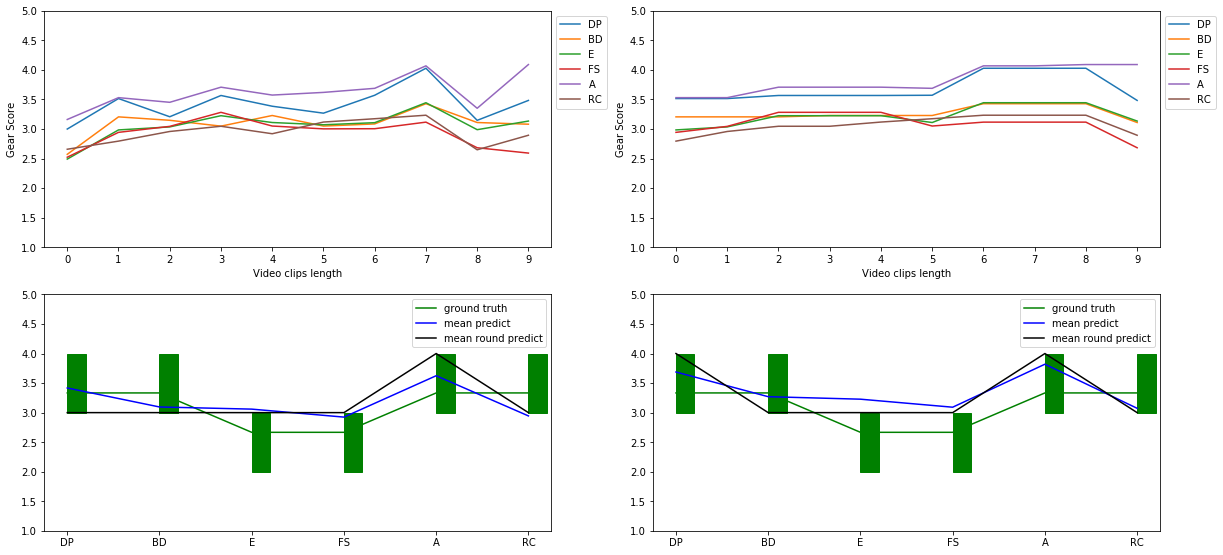

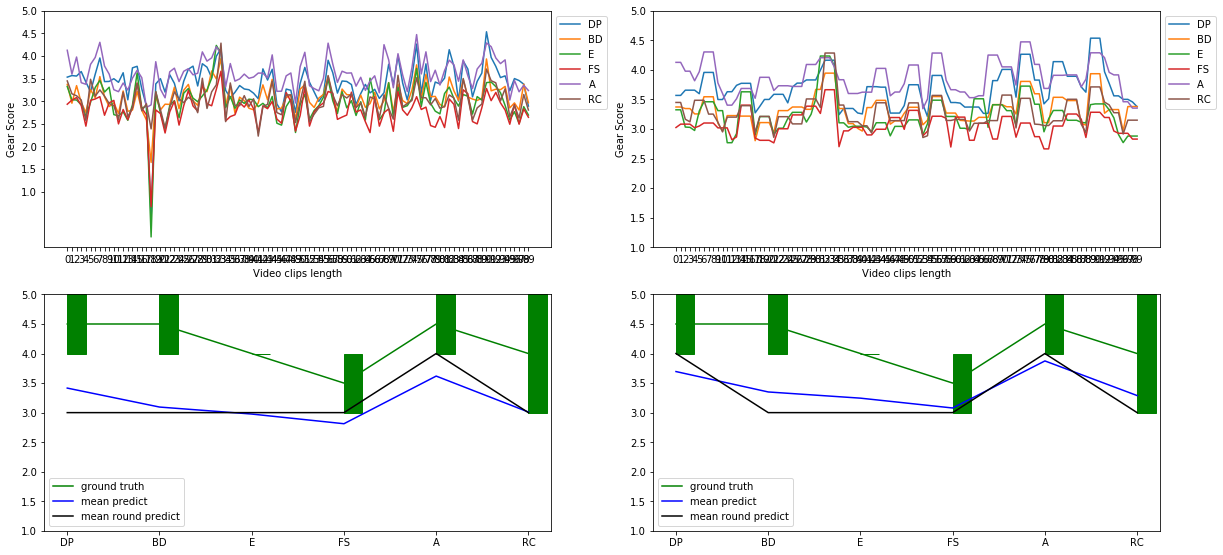

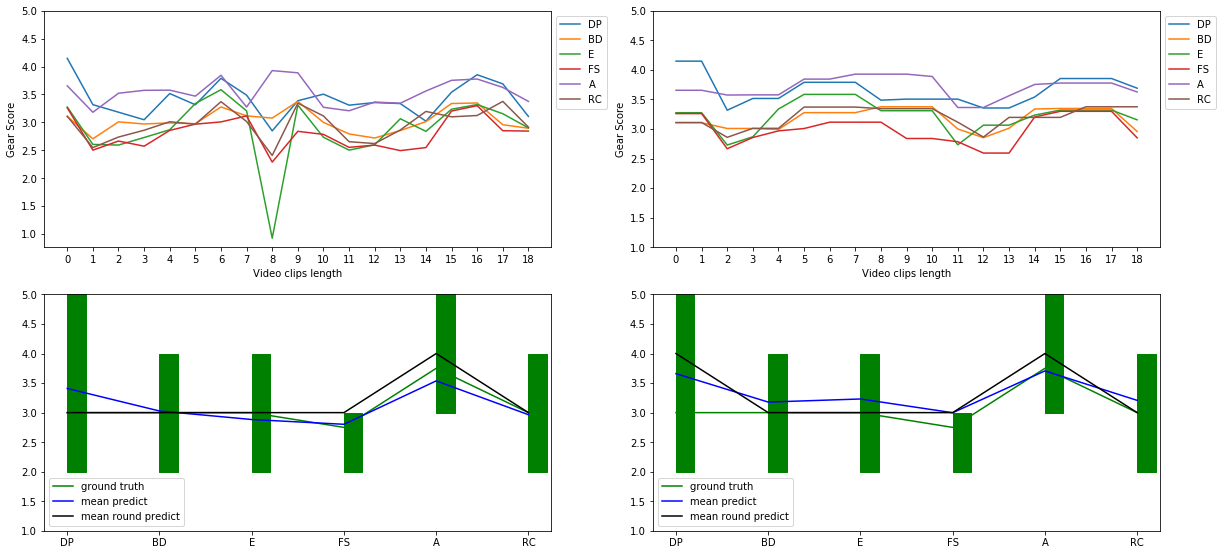

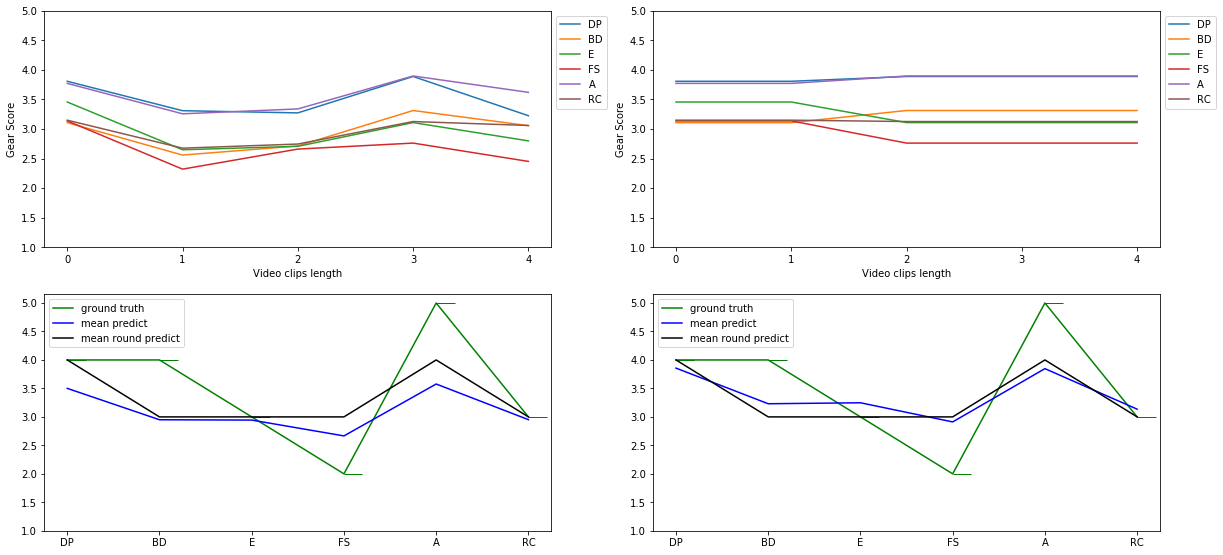

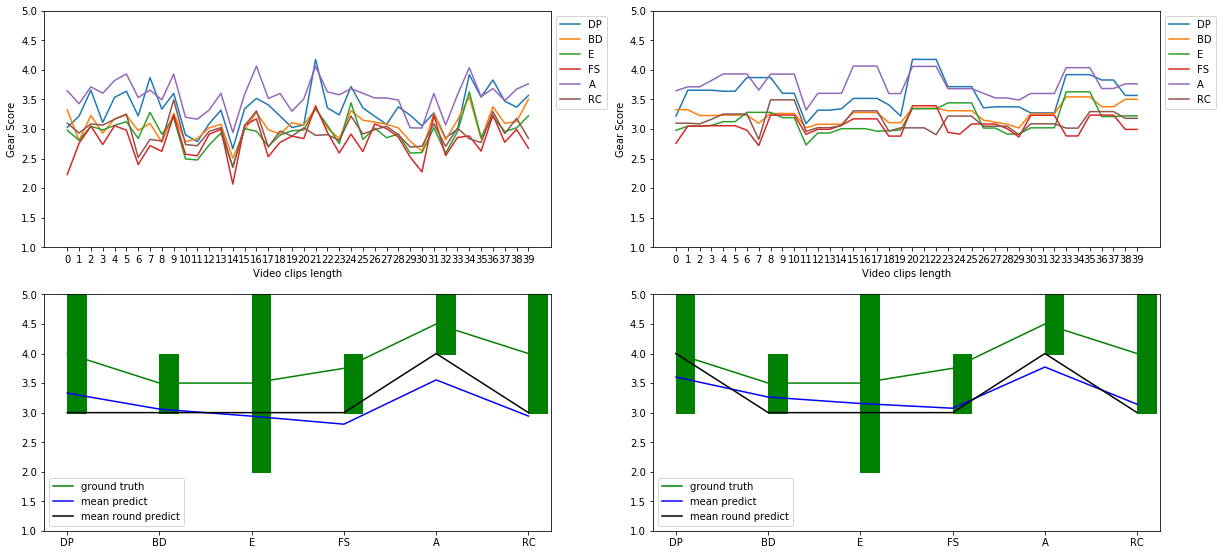

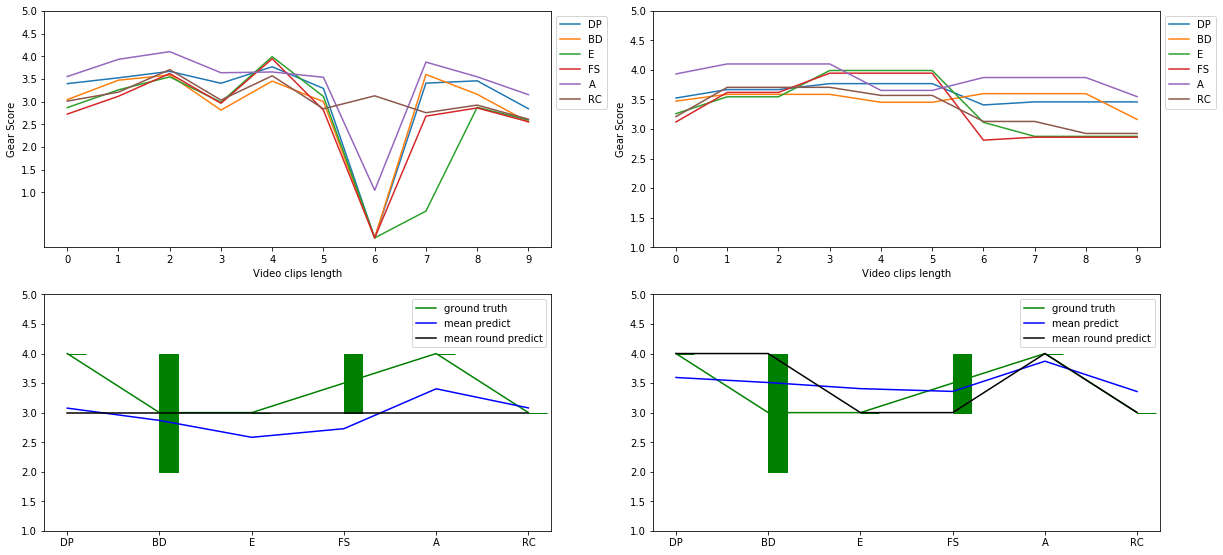

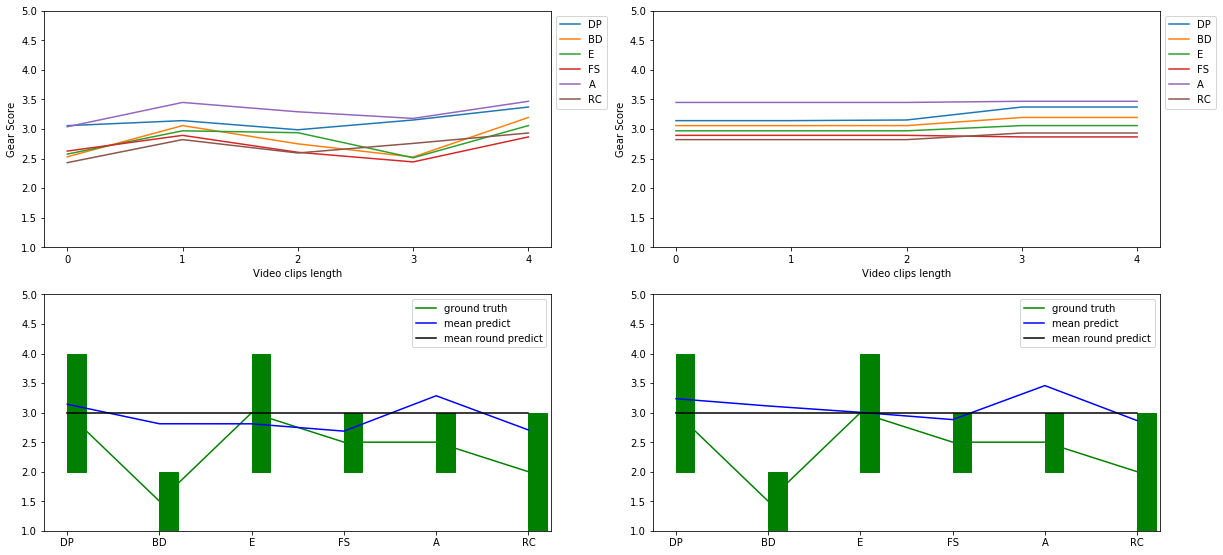

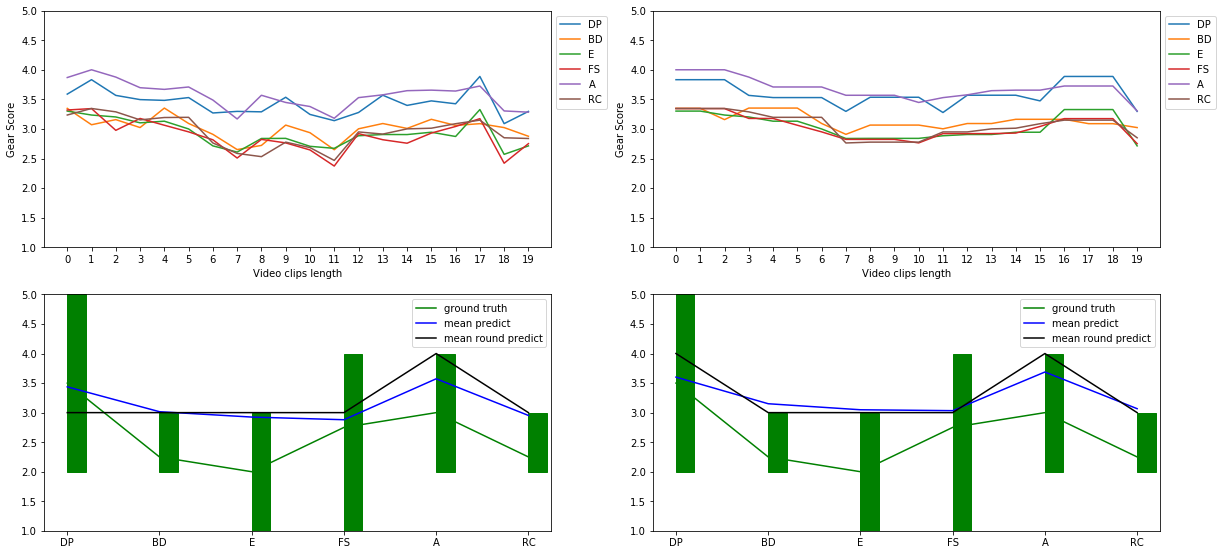

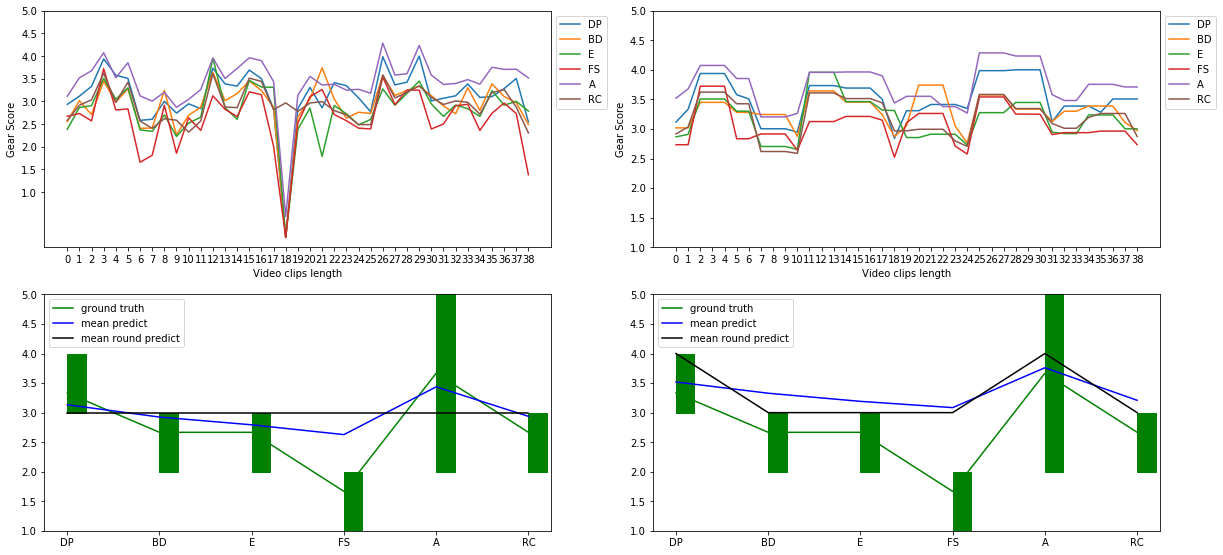

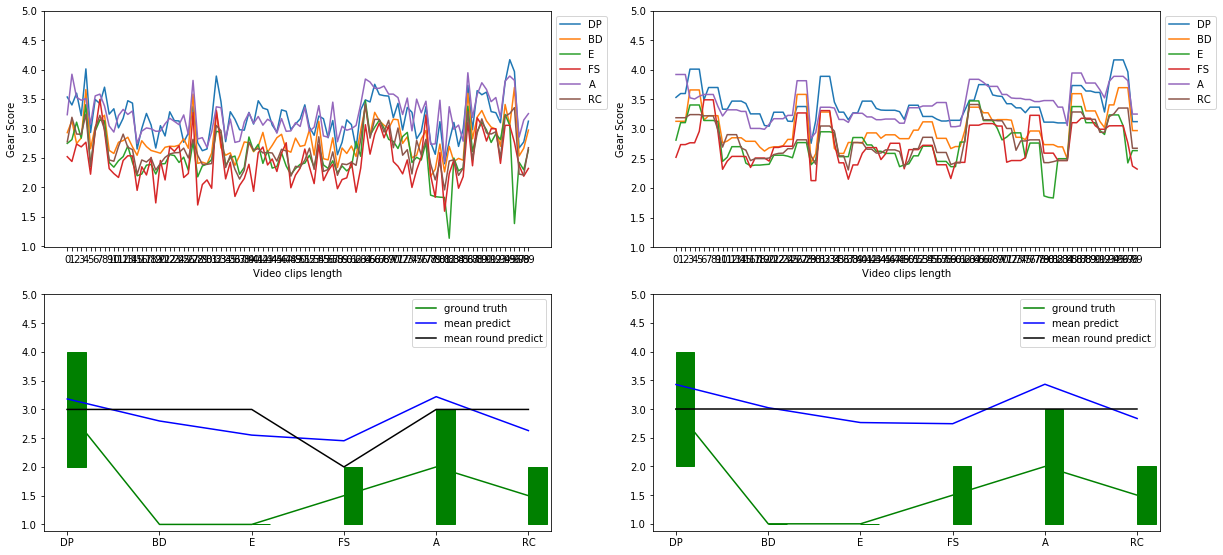

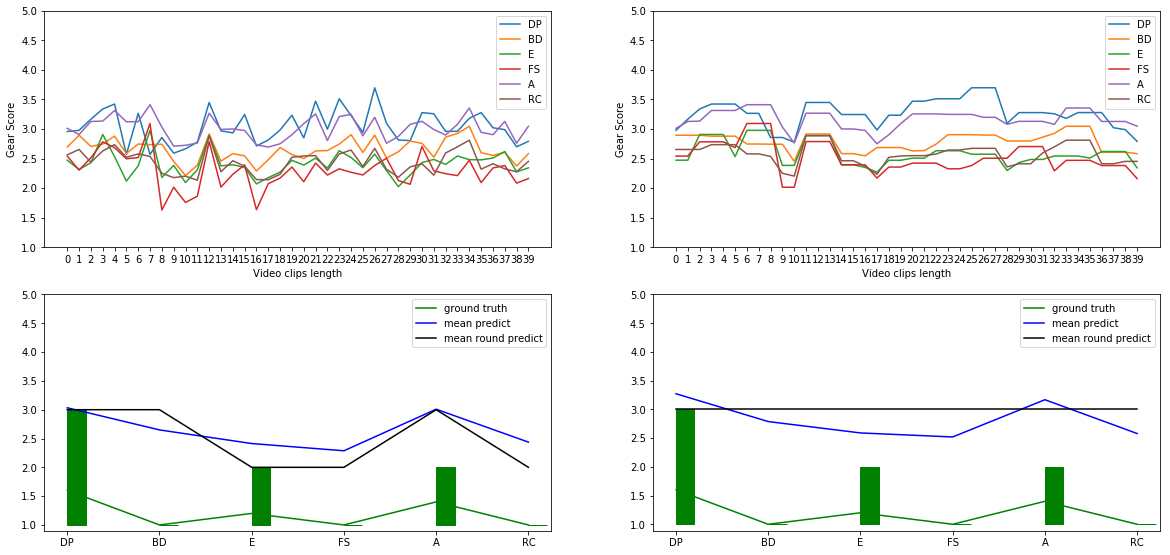

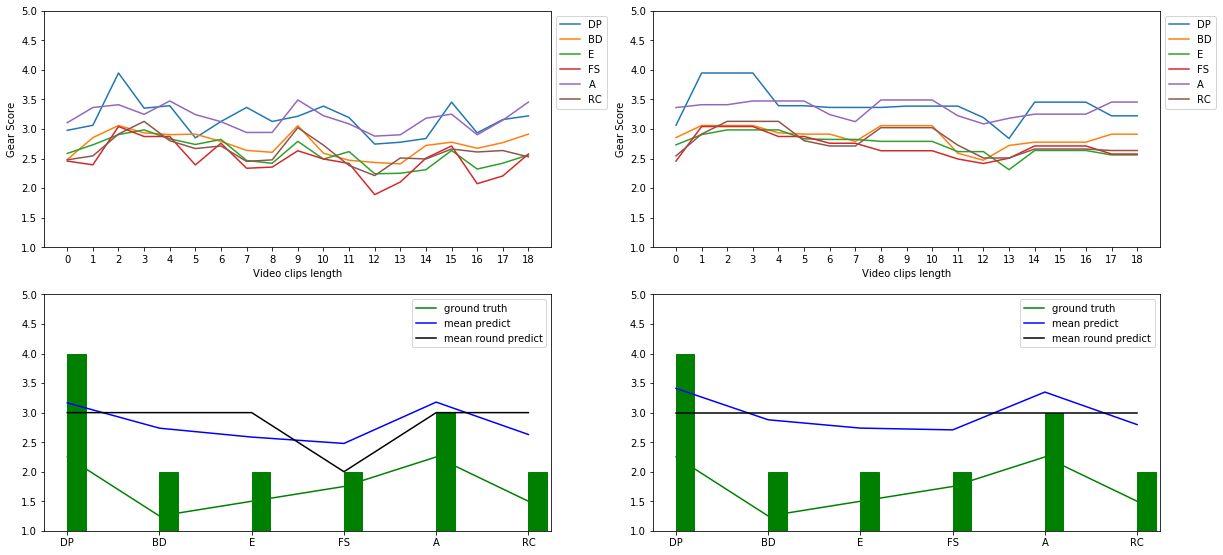

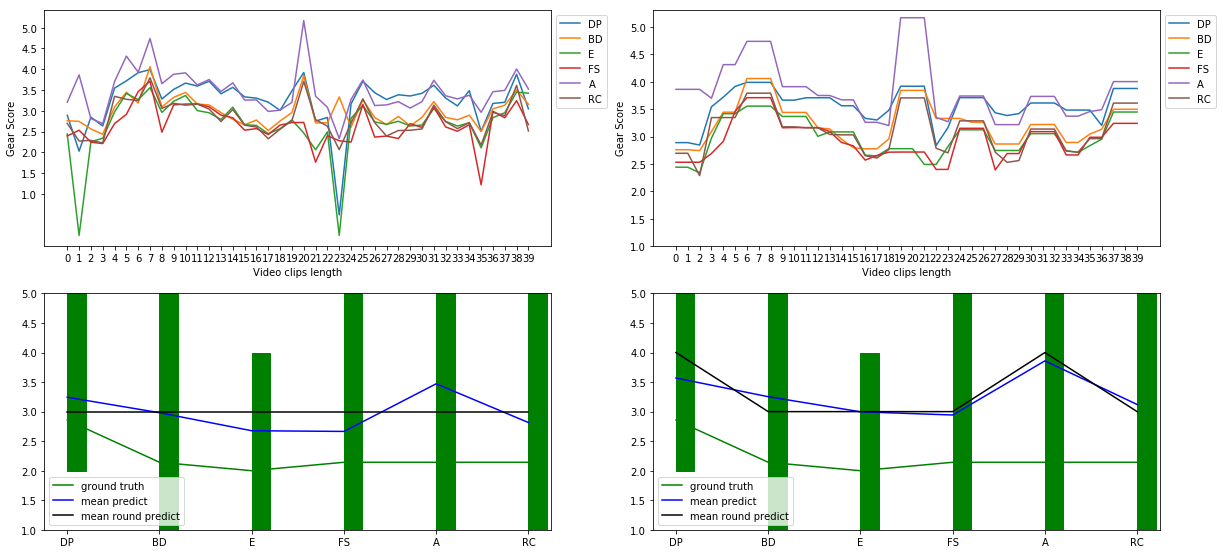

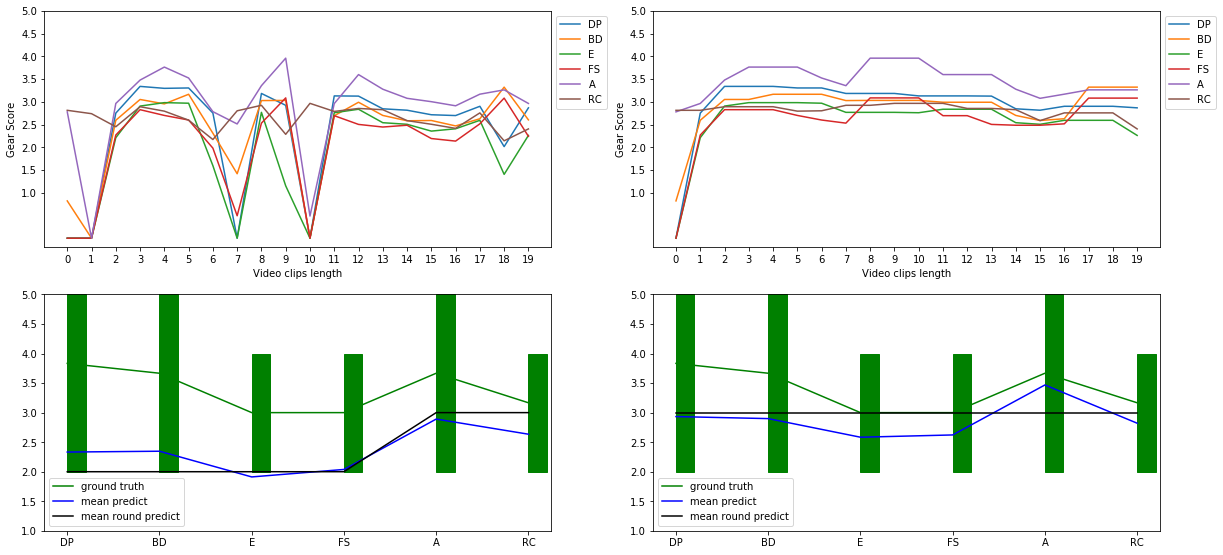

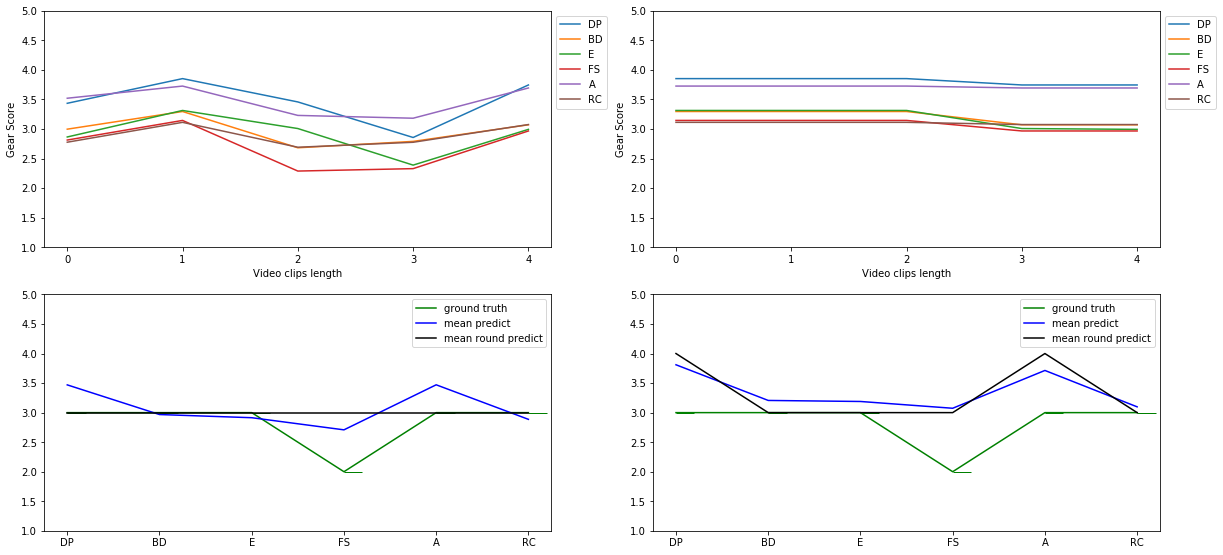

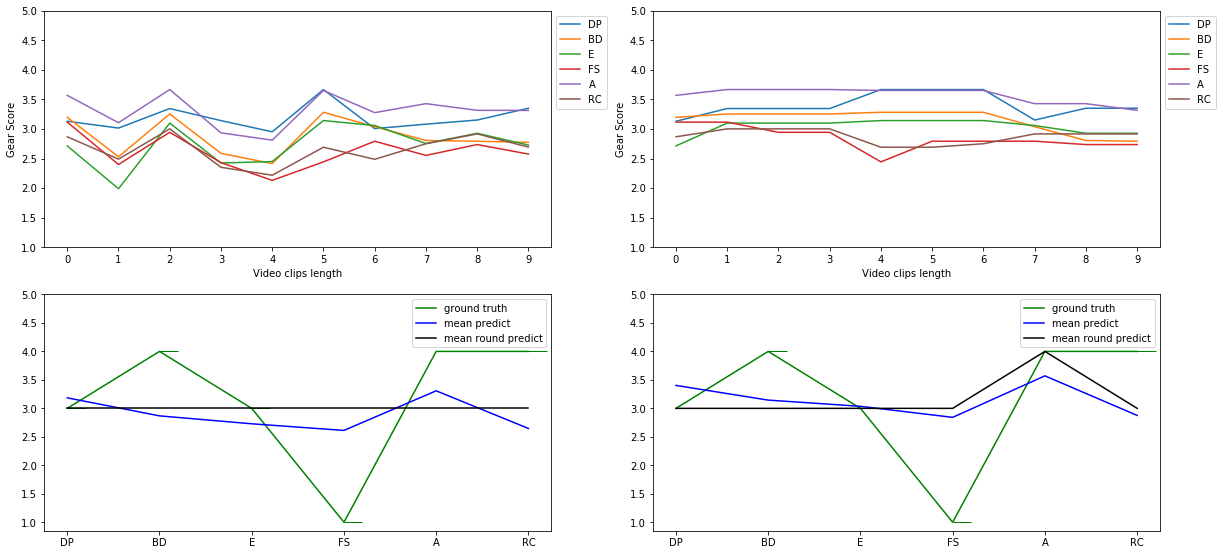

In [8]:
for t in test_video_number:
    print("Video:",t)
    re,gt = model_predit_by_videoNumber(model,folder,t,video_clips_length,time_lag,move_threshold,stride,ll)
    vmax,vmin=ll.get_video_score_range_by_video_number(t)
    plot(re,gt,vmax,vmin)